## Assignment 2b
Apply Locally weighted regression on Housing dataset and compare the accuracies found in the linear regression.   
Submitted by: **IEC2016012**   

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import timeit

plt.rcParams["figure.figsize"] = (20,6)

In [2]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
df.shape

(546, 12)

In [4]:
df.describe(include='all')

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546,546,546,546,546,546.000000,546
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,469,449,355,521,373,NaN,418
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,NaN,NaN,NaN,NaN,NaN,0.692308,NaN
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,NaN,NaN,NaN,NaN,NaN,0.861307,NaN
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [5]:
df.driveway = df.driveway.eq('yes').mul(1)
df.recroom = df.recroom.eq('yes').mul(1)
df.fullbase = df.fullbase.eq('yes').mul(1)
df.gashw = df.gashw.eq('yes').mul(1)
df.airco = df.airco.eq('yes').mul(1)
df.prefarea = df.prefarea.eq('yes').mul(1)

In [6]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


# Locally Weighted Regression

In [33]:
X = df[['lotsize','bedrooms','bathrms', 'stories', 'garagepl' ]].values #
y = df['price'].values

In [34]:
print(X.shape, y.shape)

(546, 5) (546,)


In [39]:
def lwr(x0, X, y, tau):
#     x0 = np.r_[1, x0]
#     X = np.c_[np.ones(len(X)), X]

    xdash = X.T*kernel(x0, X, tau)
    w = np.linalg.pinv(xdash@X) @ xdash@y
    
    return w

In [40]:
def kernel(x0, X, tau):
    return np.exp(-np.sum((X-x0)**2, axis=1)/(2*tau**2))

In [41]:
batch = 13
cycle = int(X.shape[0]/batch)

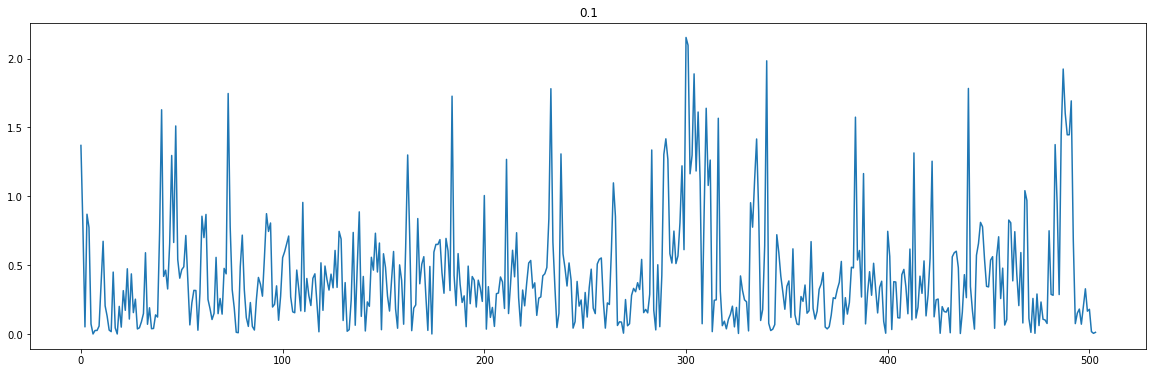

214.82019672300154


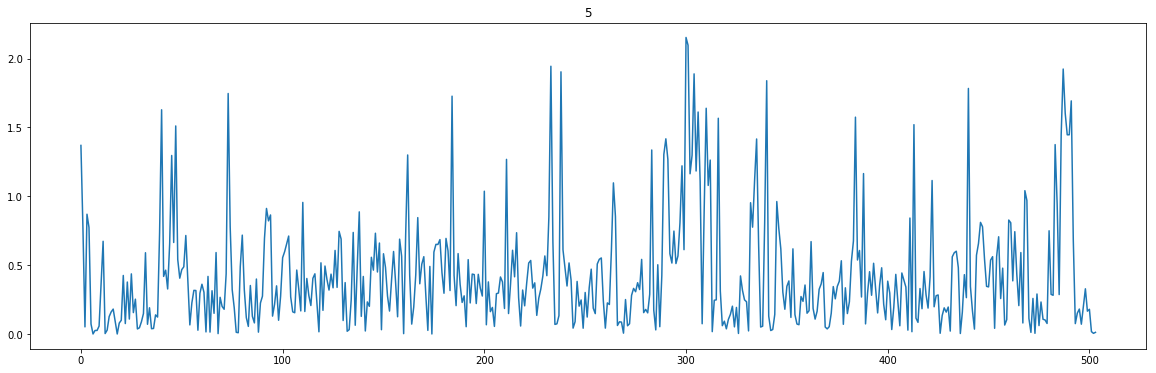

214.37987527137022


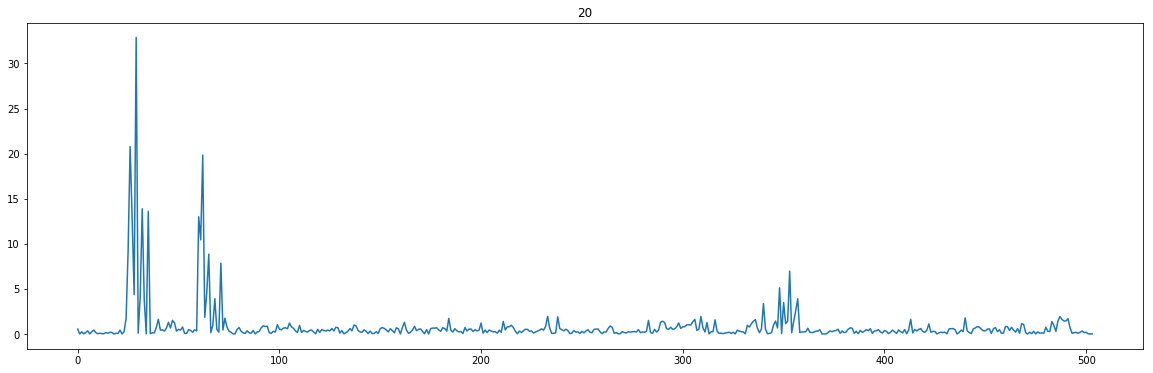

423.1097786265749


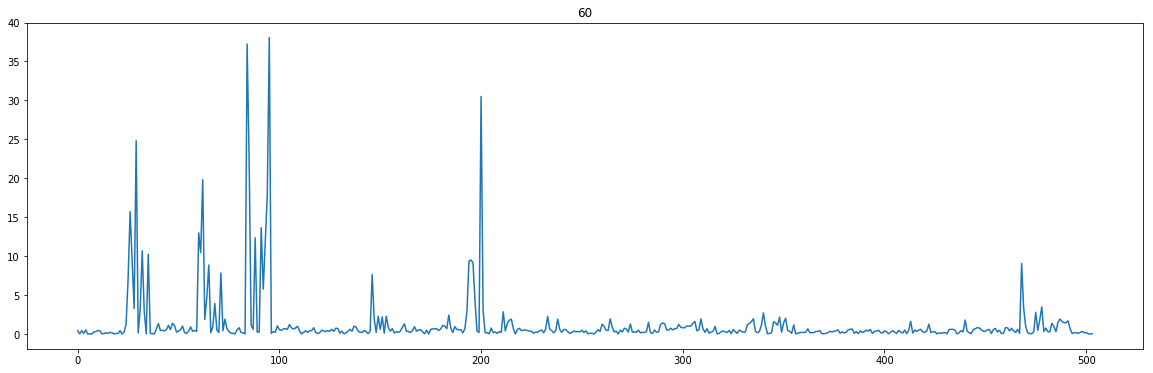

649.9490477252391


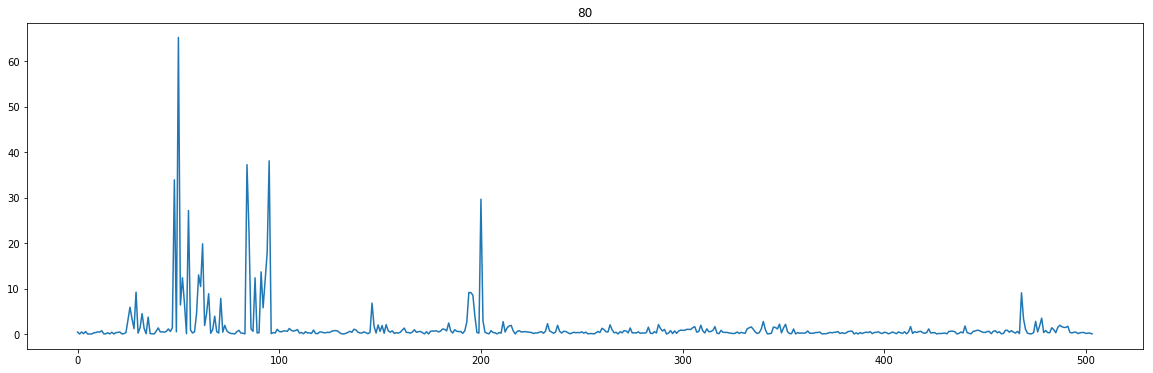

743.2894825876166


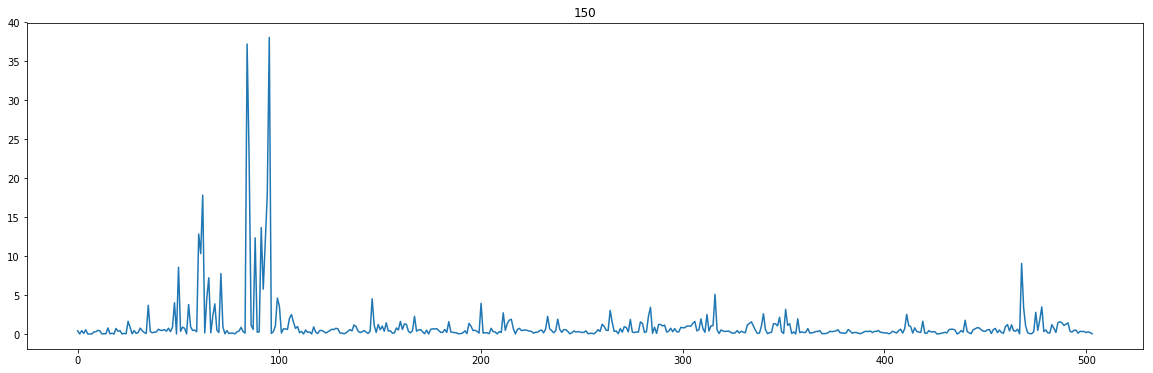

532.2495032622123


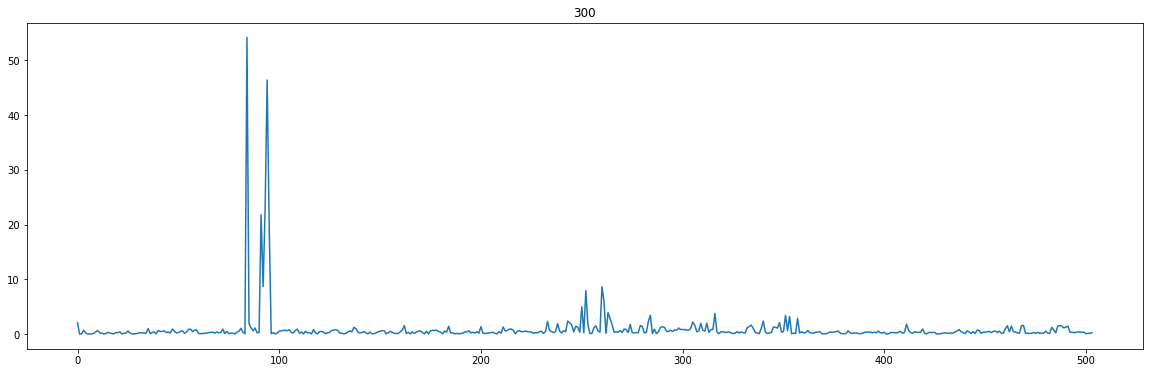

446.11420259133047


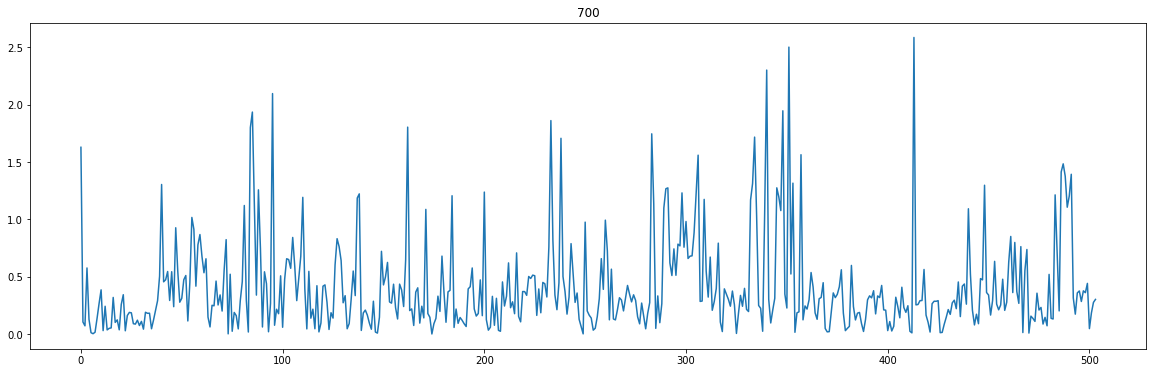

206.08951082857942


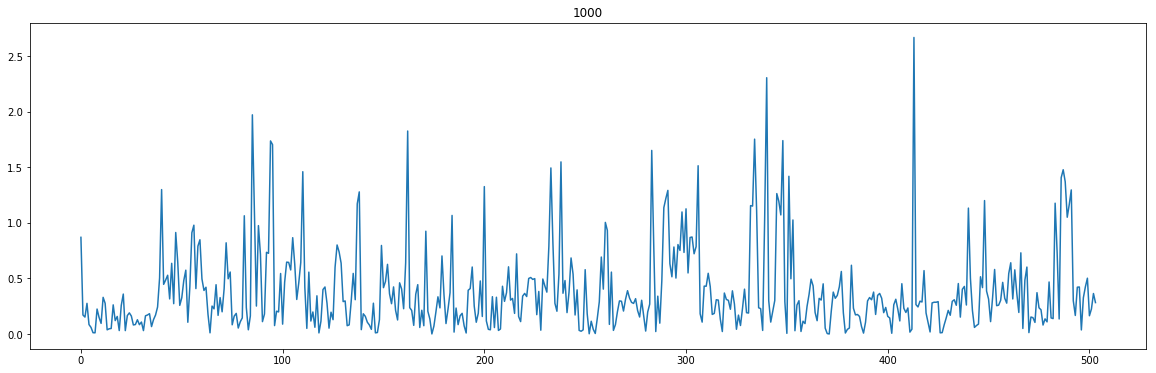

196.42618784653422


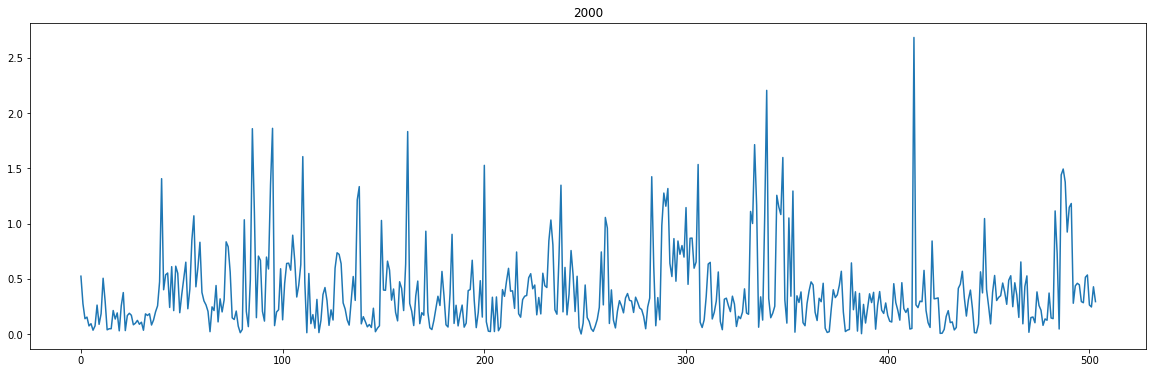

194.7122040385774


In [59]:
domain = np.linspace(1000, 17000, num=300)
taus = [0.1,5,20,60,80,150,300,700,1000,2000]
preds = []
plt.rcParams["figure.figsize"] = (20,6)

for tau in taus:
    xprime = []
    for i in range(0,cycle):
        tx0 = X[batch*i+int(batch/2)]
        tx = X[batch*i:batch*(i+1)-1]
        ty = y[batch*i:batch*(i+1)-1]
        xprime = np.append(xprime, tx@lwr(tx0,tx,ty,tau).T)
    
    err = np.abs(np.divide((xprime-y[:xprime.size]),y[:xprime.size]))
    plt.plot(err) 
    plt.title(tau)
    plt.show()
    print(err.sum())

In [ ]:
print("A good value of bandwidth(tau) is: 300")

## Conclusion

It can be inferred that:
 - A small value of tau would lead to **Overfitting**
 - Too big a value will falsify the use of this non-parametric algorithm
 - A good value of tau could be found in the range of 150-300